## Importing libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Reading data

In [5]:
df = pd.read_csv('well2.csv')
df_1 = pd.read_csv('well 16A.csv')
df_2 = pd.read_excel("well F-4.xlsx", sheet_name='Drilling Parameters')

In [6]:
df.head()

,Depth (ft),Weight on bit (k-lbs),Hook load (k-lbs),Surface Torque (psi),Rotary Speed (rpm),Flow In (gal/min),ROP (ft/hr)
0,91.39,0.76,29.33,8.97,62.07,1102.06,450.72
1,97.75,2.13,27.96,8.97,56.05,1103.28,348.28
2,114.50,2.82,27.27,8.82,97.45,1066.39,368.77
3,117.63,0.61,29.48,8.82,89.82,1073.92,348.28
4,286.71,6.08,74.32,11.22,0.00,1037.12,58.22


In [7]:
df_1.sample(6)

,Time,Total Depth,Block Position,Weight on Bit,Hookload,ROP Depth/Hour,Top Drive RPM,Top Drive Torque (ft-lbs),Flow In,Return Flow
336487,12/11/2020 18:35,8535.0,84.70821,208.38437,44.48251,0.0,0.15080,0.0,43.50702,42.35579
449167,12/29/2020 10:53,10987.0,52.04353,16.33865,202.74973,0.0,0.41245,0.0,0.00000,1.43153
479308,1/4/2021 20:57,10987.0,40.60451,186.10196,40.30299,0.0,0.00000,0.0,0.00000,0.00000
333365,12/11/2020 9:52,8535.0,84.72376,212.70111,40.17505,0.0,0.37219,0.0,0.00000,2.76115
111872,11/11/2020 14:20,5113.0,78.11756,172.26292,43.54425,0.0,0.21118,0.0,0.00000,53.22832
436017,12/27/2020 0:51,10987.0,4.07331,1.86132,36.12347,0.0,0.15080,0.0,0.00000,2.55400


# First model

## Merge two data sets into new data set

In [8]:
ROP = df['ROP (ft/hr)'].append(df_1['ROP Depth/Hour'])
rpm = df['Rotary Speed (rpm)'].append(df_1['Top Drive RPM'])
WOB = df['Weight on bit (k-lbs)'].append(df_1['Weight on Bit'])
Torque = df['Surface Torque (psi)'].append(df_1['Top Drive Torque (ft-lbs)'])

C:\Users\IT_Center\AppData\Local\Temp\ipykernel_3252\2023585234.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ROP = df['ROP (ft/hr)'].append(df_1['ROP Depth/Hour'])
C:\Users\IT_Center\AppData\Local\Temp\ipykernel_3252\2023585234.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rpm = df['Rotary Speed (rpm)'].append(df_1['Top Drive RPM'])
C:\Users\IT_Center\AppData\Local\Temp\ipykernel_3252\2023585234.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  WOB = df['Weight on bit (k-lbs)'].append(df_1['Weight on Bit'])
C:\Users\IT_Center\AppData\Local\Temp\ipykernel_3252\2023585234.py:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

In [6]:
print(len(ROP))
print(len(rpm))
print(len(WOB))
print(len(Torque))

491141
491141
491141
491141


In [10]:
data = pd.DataFrame({'ROP':ROP, 'rpm': rpm, 'WOB': WOB, 'Torque': Torque})

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491141 entries, 0 to 484031
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ROP     491140 non-null  float64
 1   rpm     491140 non-null  float64
 2   WOB     491140 non-null  float64
 3   Torque  491140 non-null  float64
dtypes: float64(4)
memory usage: 18.7 MB


In [12]:
data = data.dropna()
data.sample(20)

,ROP,rpm,WOB,Torque
221228,0.00000,0.23131,155.89081,0.0000
79453,0.00000,0.55333,149.07356,0.0000
304878,0.00000,0.19106,174.25092,0.0000
477301,0.00000,0.11055,185.18495,0.0000
462937,0.00000,0.05017,183.67418,1922.3568
67183,23.89062,73.59242,37.78608,3718.3967
20011,0.00000,0.16929,0.11667,0.0000
459589,0.00000,0.03004,183.32132,0.0000
435527,0.00000,0.41245,0.38516,0.0000
342181,116.74545,69.54699,37.58836,10228.2820


## Make standard scaler to data

In [14]:
target_1 = data['Torque']
inputs_1 = data[['ROP', 'rpm','WOB']]

In [16]:
scaler_standard = StandardScaler()
input_scaled = scaler_standard.fit_transform(inputs_1)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(input_scaled, target_1, test_size=0.2)

## Train the model

In [18]:
Reg = RandomForestRegressor()
Reg.fit(X_train, y_train)
Reg.score(X_test, y_test)

0.8632196199836359

In [19]:
y_pred = Reg.predict(X_test)

In [20]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

## Visualize model performance

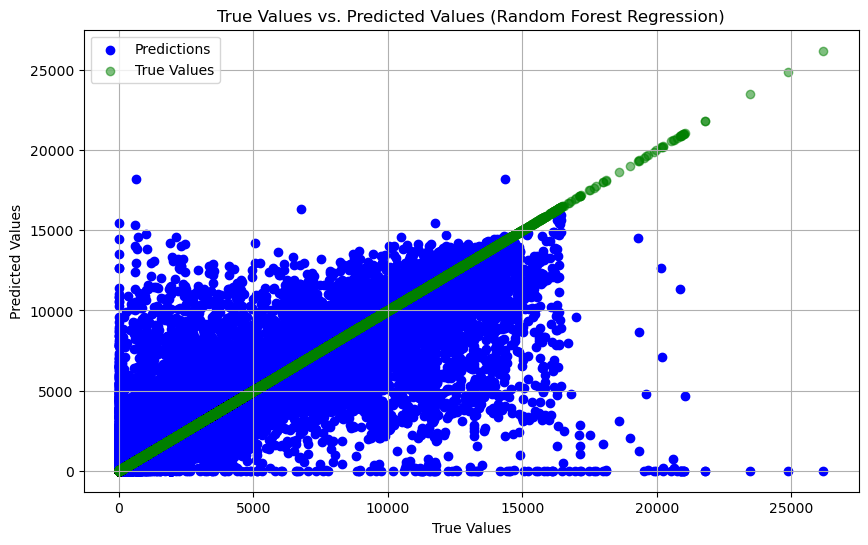

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predictions')
plt.scatter(y_test, y_test, color='green', label='True Values', alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs. Predicted Values (Random Forest Regression)')
plt.legend()
plt.grid(True)
plt.show()

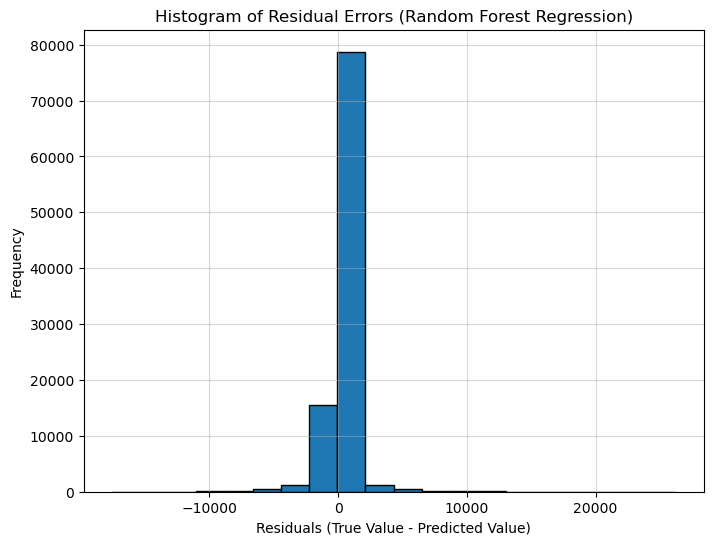

In [22]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, edgecolor='black')
plt.xlabel('Residuals (True Value - Predicted Value)')
plt.ylabel('Frequency')
plt.title('Histogram of Residual Errors (Random Forest Regression)')
plt.grid(True, alpha=0.5)
plt.show()

## Model score

In [25]:
print(f'model score is {np.round(r2*100,2)} %', f'\nmean square error {np.round(mse,2)}') # add round

model score is 86.32 % 
mean square error 1345890.43


# Second model

## Check data quality

In [26]:
df_1.isnull().sum()

Time                            0
Total Depth                     1
Block Position                  0
Weight on Bit                   1
Hookload                        1
ROP Depth/Hour                  1
Top Drive RPM                   1
Top Drive Torque (ft-lbs)       1
Flow In                      1012
Return Flow                     1
dtype: int64

In [27]:
df_1 = df_1.dropna()

In [28]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 483019 entries, 0 to 484031
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Time                       483019 non-null  object 
 1   Total Depth                483019 non-null  float64
 2   Block Position             483019 non-null  float64
 3   Weight on Bit              483019 non-null  float64
 4   Hookload                   483019 non-null  float64
 5   ROP Depth/Hour             483019 non-null  float64
 6   Top Drive RPM              483019 non-null  float64
 7   Top Drive Torque (ft-lbs)  483019 non-null  float64
 8   Flow In                    483019 non-null  float64
 9   Return Flow                483019 non-null  float64
dtypes: float64(9), object(1)
memory usage: 40.5+ MB


In [29]:
df_2.isnull().sum()

Depth          0
TVD           21
ROP           21
WOB           21
Torque        21
RPm           21
SPP           21
Flow pumps    21
Tot Gas       21
mW IN         21
D Exp         21
dtype: int64

In [30]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Depth       675 non-null    object
 1   TVD         654 non-null    object
 2   ROP         654 non-null    object
 3   WOB         654 non-null    object
 4   Torque      654 non-null    object
 5   RPm         654 non-null    object
 6   SPP         654 non-null    object
 7   Flow pumps  654 non-null    object
 8   Tot Gas     654 non-null    object
 9   mW IN       654 non-null    object
 10  D Exp       654 non-null    object
dtypes: object(11)
memory usage: 58.1+ KB


In [31]:
df_2 = df_2.dropna()

In [32]:
target_2 = df_1['Hookload']
inputs_2 = df_1[['Weight on Bit', 'ROP Depth/Hour', 'Top Drive Torque (ft-lbs)', 'Flow In', 'Block Position', 'Top Drive RPM']]

In [33]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(inputs_2, target_2, test_size=0.2)

## Model training

In [34]:
model = RandomForestRegressor()
model.fit(X_train_1, y_train_1)
model.score(X_test_1, y_test_1)

0.9425561210883305

In [35]:
y_pred_1 = model.predict(X_test_1)

## Visualize model performance

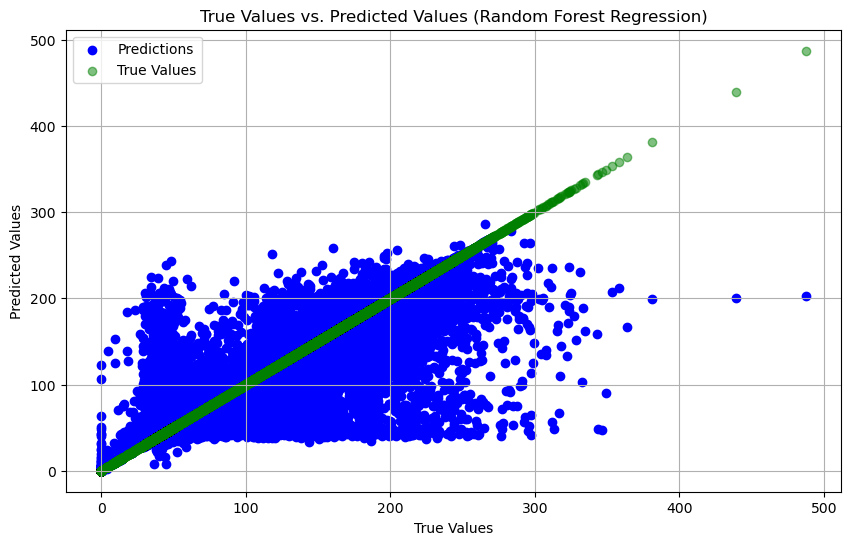

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_1, y_pred_1, color='blue', label='Predictions')
plt.scatter(y_test_1, y_test_1, color='green', label='True Values', alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs. Predicted Values (Random Forest Regression)')
plt.legend()
plt.grid(True)
plt.show()

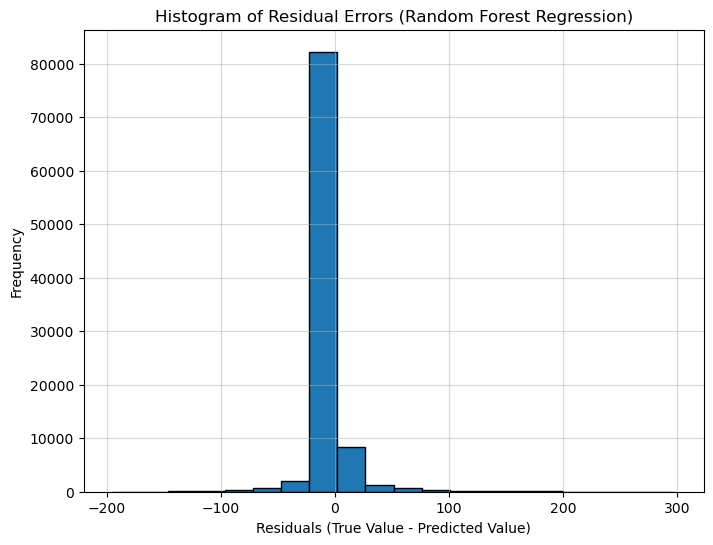

In [37]:
residuals = y_test_1 - y_pred_1

plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, edgecolor='black')
plt.xlabel('Residuals (True Value - Predicted Value)')
plt.ylabel('Frequency')
plt.title('Histogram of Residual Errors (Random Forest Regression)')
plt.grid(True, alpha=0.5)
plt.show()

In [38]:
r2_1 = r2_score(y_test_1, y_pred_1)
mse_1 = mean_squared_error(y_test_1, y_pred_1)

## model score

In [40]:
print(f'model score is {np.round(r2_1*100, 2)} %', f'\nmean square error {np.round(mse_1,2)}') # add round

model score is 94.26 % 
mean square error 314.36


## Third model

In [41]:
# df_2 = df_2.iloc[1:] #uncomment to remove first row
df_2

,Depth,TVD,ROP,WOB,Torque,RPm,SPP,Flow pumps,Tot Gas,mW IN,D Exp
22,255,255,101.54,6.63,1.38,150,86.4,3675,0,1.03,0.66
23,260,260,78.68,5.52,4.8,150,91.9,3675,0,1.03,0.7
24,265,265,45.84,2.39,3.58,150,90.5,3675,0,1.03,0.68
25,270,270,37.43,2.46,4.16,150,90.9,3675,0,1.03,0.72
26,275,275,28.63,2.47,3.4,138,77.9,3278,0,1.03,0.89
...,...,...,...,...,...,...,...,...,...,...,...
670,3495,3091.82,27.88,3.57,21.72,140,209.1,2227,0.28,1.4,0.74
671,3500,3094.85,27.82,3.57,21.45,140,209.9,2227,0.3,1.4,0.74
672,3505,3097.87,28.21,3.6,21.62,140,209.4,2227,0.27,1.4,0.74
673,3510,3100.9,19.33,5.9,22.39,140,209.3,2227,0.2,1.4,0.91


In [42]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 22 to 674
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Depth       653 non-null    object
 1   TVD         653 non-null    object
 2   ROP         653 non-null    object
 3   WOB         653 non-null    object
 4   Torque      653 non-null    object
 5   RPm         653 non-null    object
 6   SPP         653 non-null    object
 7   Flow pumps  653 non-null    object
 8   Tot Gas     653 non-null    object
 9   mW IN       653 non-null    object
 10  D Exp       653 non-null    object
dtypes: object(11)
memory usage: 61.2+ KB


## convert features to approprete data type

In [43]:
df_2['SPP'] = df_2['SPP'].astype(float)
df_2['Flow pumps'] = df_2['Flow pumps'].astype(float)
df_2['ROP'] = df_2['ROP'].astype(float)
df_2['WOB'] = df_2['WOB'].astype(float)

In [44]:
target_3 = df_2['SPP']
inputs_3 = df_2[['Flow pumps', 'ROP', 'WOB']]

In [45]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(inputs_3, target_3, test_size=0.2)

## Train the model

In [46]:
model = RandomForestRegressor()
model.fit(X_train_2, y_train_2)
model.score(X_test_2, y_test_2)

0.9099799625057349

In [47]:
y_pred_2 = model.predict(X_test_2)

In [48]:
r2_2 = r2_score(y_test_2, y_pred_2)
mse_2 = mean_squared_error(y_test_2, y_pred_2)

## Visualize model performance

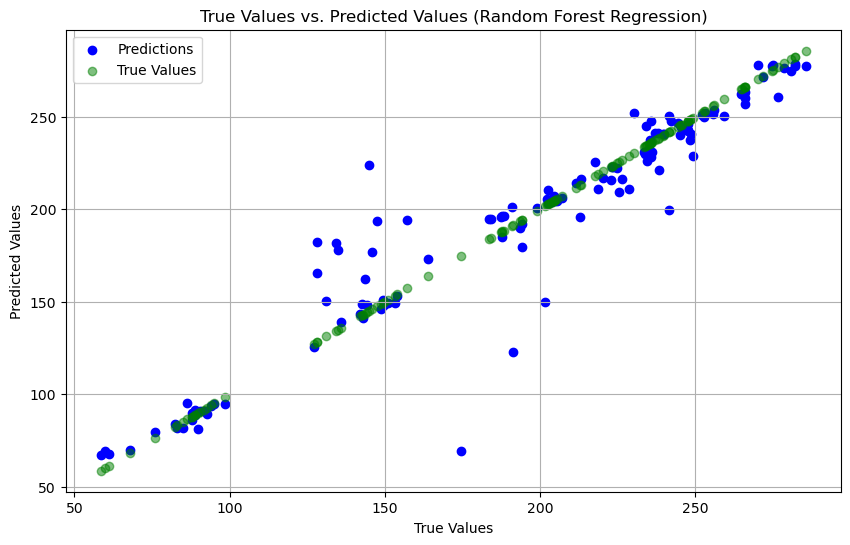

In [49]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_2, y_pred_2, color='blue', label='Predictions')
plt.scatter(y_test_2, y_test_2, color='green', label='True Values', alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs. Predicted Values (Random Forest Regression)')
plt.legend()
plt.grid(True)
plt.show()

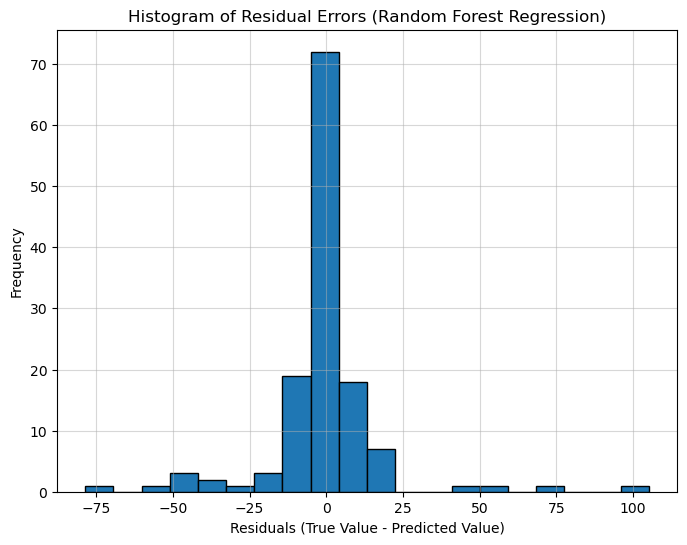

In [50]:
residuals = y_test_2 - y_pred_2

plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, edgecolor='black')
plt.xlabel('Residuals (True Value - Predicted Value)')
plt.ylabel('Frequency')
plt.title('Histogram of Residual Errors (Random Forest Regression)')
plt.grid(True, alpha=0.5)
plt.show()

## Model score

In [52]:
print(r2_2, mse_2)
print(f'model score is {np.round(r2_2*100, 2)} %', f'\nmean square error {np.round(mse_2, 2)}')

0.9099799625057349 347.14374749618304
model score is 91.0 % 
mean square error 347.14
